### Time Series Data

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Download AAPL stock data from January 1, 2024 to September 30, 2024
stock_data = yf.download('AAPL', start='2024-01-01', end='2024-09-30')

# If the DataFrame has multi-level columns, flatten them by keeping only the top level
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = stock_data.columns.get_level_values(0)

# Display the first 10 rows of the updated DataFrame
print(stock_data.head(10))

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Date                                                                
2024-01-02  184.532074  187.315366  182.792518  186.033057  82488700
2024-01-03  183.150375  184.770652  182.335262  183.120556  58414500
2024-01-04  180.824356  181.997307  179.800504  181.062914  71983600
2024-01-05  180.098709  181.669281  179.094742  180.903888  62303300
2024-01-08  184.452560  184.492330  180.416793  181.003268  59144500
2024-01-09  184.035065  184.045000  181.639444  182.822345  42841800
2024-01-10  185.078827  185.287565  182.822370  183.249812  46792900
2024-01-11  184.482376  185.933669  182.524132  185.426703  49128400
2024-01-12  184.810410  185.625523  184.084771  184.949573  40444700
2024-01-16  182.534088  183.160318  179.850190  181.072860  65603000


In [8]:
#import yfinance as yf # yfinance means yahoo finance
#import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings('ignore')

#stock_data = yf.download('AAPL', start='2024-01-01') # AAPL means ticker symbol
#stock_data.head(10)

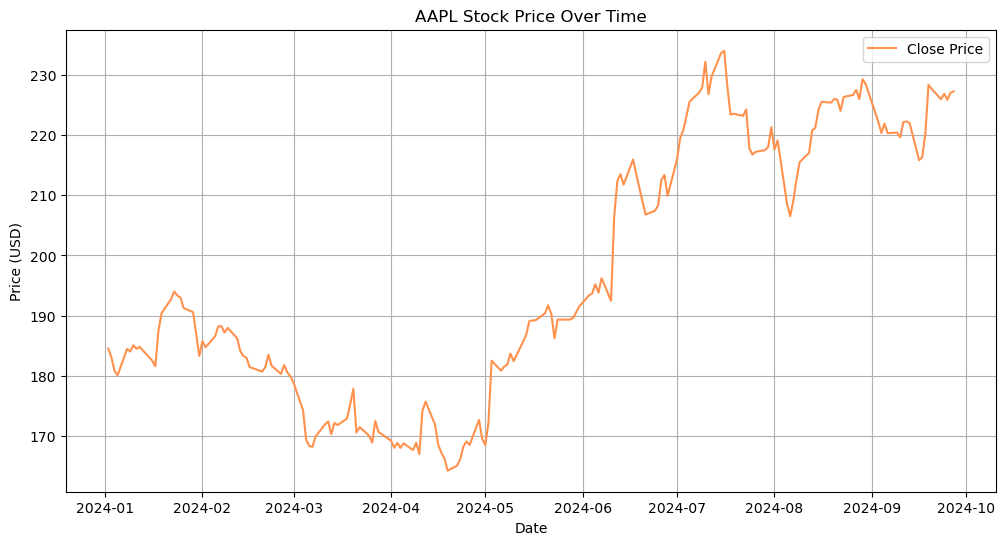

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='#FF914D')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

### Classical Time Series Decomposition

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(stock_data['Close'], model='additive', period=30) # Additive because in the above AAPL stock seasonal variation is not multiplying with respect to the trend and period is '30' i.e. 1 month period

In [15]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

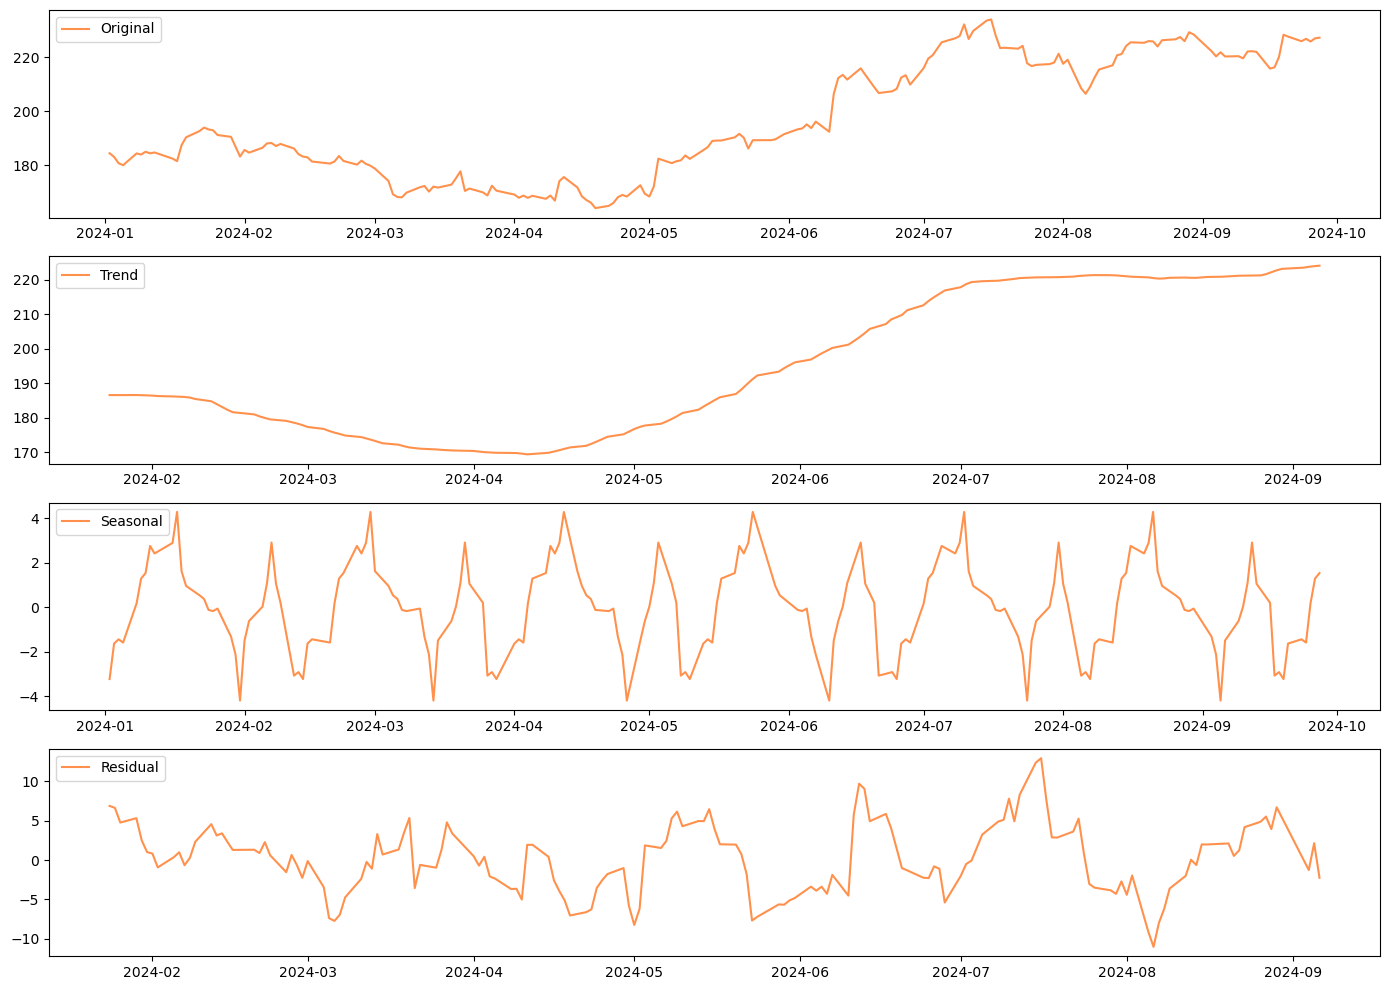

In [17]:
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive, label='Trend', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonal', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive, label='Residual', color='#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### STL Decomposition

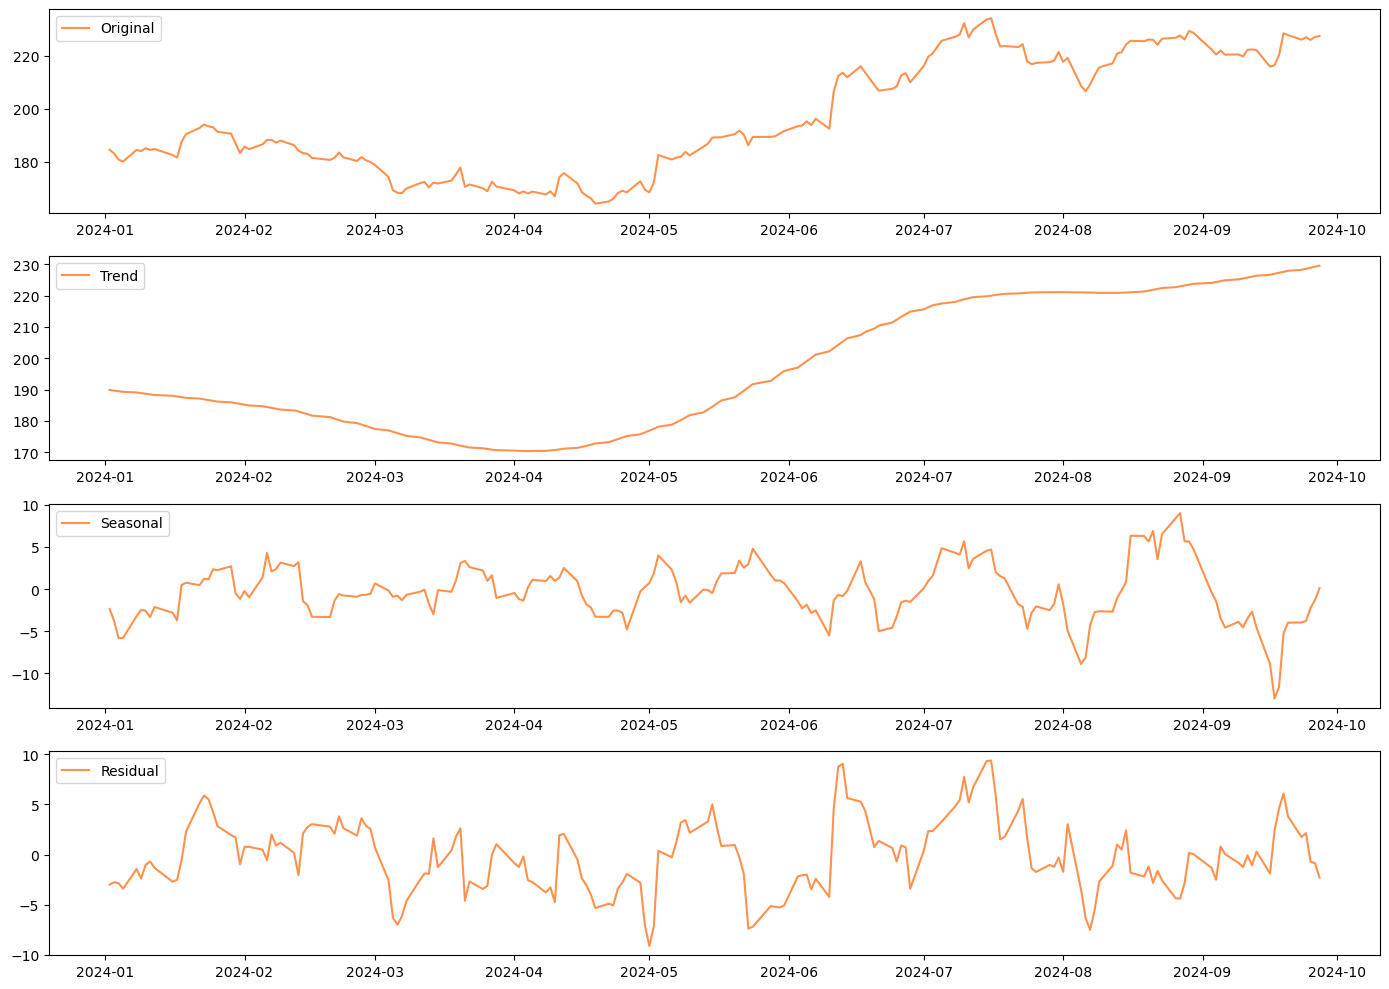

In [20]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition
stl = STL(stock_data['Close'], period=30) # Only supports additive model hence we don't have 'model' parameters
result = stl.fit()

# Plot the decomposition patterns
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(result.observed, label='Original', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Stationarity Test

In [23]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(stock_data['Close'])

print('ADF Test Results:')
print(f'ADF Statistic: {round(adf_test[0],3)}')
print(f'p-value: {round(adf_test[1], 3)}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f' {key}: {round(value, 3)}')

ADF Test Results:
ADF Statistic: -0.463
p-value: 0.899
Critical Values:
 1%: -3.466
 5%: -2.877
 10%: -2.575


- Here p-value > 0.05 means data is non-stationary. Hence we will accept the null hypothesis.

In [26]:
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test
kpss_test = kpss(stock_data['Close'], regression='ct') # 'c' for constant (level stationarity), 'ct' for trend

print('KPSS Test Results:')
print(f'KPSS Statistic: {round(kpss_test[0],2)}')
print(f'p-value: {kpss_test[1]}')
print('Critical Values:')
for key, value in kpss_test[3].items():
    print(f' {key}: {value}')

KPSS Test Results:
KPSS Statistic: 0.31
p-value: 0.01
Critical Values:
 10%: 0.119
 5%: 0.146
 2.5%: 0.176
 1%: 0.216


/var/folders/hg/8q7v9sjj0g1b80ygnp88_xm80000gn/T/ipykernel_39683/1096884572.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_data['Close'], regression='ct') # 'c' for constant (level stationarity), 'ct' for trend


- Here p-value < 0.05 means data is non-stationary. Hence we will accept the alternate hypothesis.

#### Hence the above data is Weak Stationarity Data as it is real-time data.

## For understanding Weak and Strict Stationarity let's generate Synthetic data with the help of random variables:

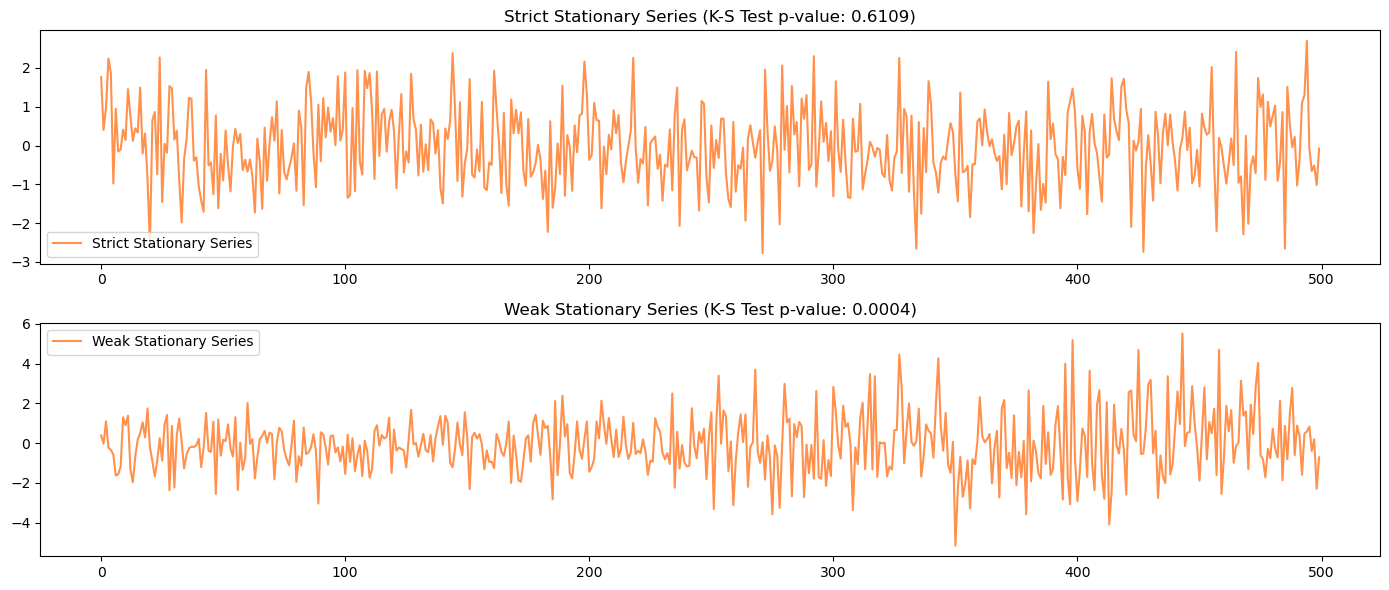

Strict Stationary Series - K-S Test Statistic: 0.068, p-value: 0.6109
Weak Stationary Series - K-S Test Statistic: 0.184, p-value: 0.0004


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Generating synthetic data for demonstration
np.random.seed(0) # 'seed' is set to '0' because humara jab bhi ye wala snippet run hoga toh same random value generate hoga
n = 500

# Strictly stationary series: normally distributed random noise
strict_stationary_series = np.random.normal(0, 1, n)

# Non-strictly (Weak) stationary series: changing variance
non_strict_stationary_series = np.concatenate([
    np.random.normal(0, 1, n // 2),
    np.random.normal(0, 2, n // 2)
])

# Function to split the series into two halves and perform the K-S test
def ks_test_stationarity(series):
    split = len(series) // 2 # 500 will be divided by 2 and hence we will get 250 values two times
    series_first_half = series[:split] # 250 values
    series_second_half = series[split:] # 250 values
    stat, p_value = ks_2samp(series_first_half, series_second_half)
    return stat, p_value

# Perform the K-S test on strictly stationary series
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(strict_stationary_series)

# Perform the K-S test on non-strictly stationary series
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strict_stationary_series)

# Plotting the series
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(strict_stationary_series, label='Strict Stationary Series', color='#FF914D')
plt.title(f'Strict Stationary Series (K-S Test p-value: {ks_pvalue_strict:.4f})')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(non_strict_stationary_series, label='Weak Stationary Series', color='#FF914D')
plt.title(f'Weak Stationary Series (K-S Test p-value: {ks_pvalue_non_strict:.4f})')
plt.legend()

plt.tight_layout()
plt.show()

print(f'Strict Stationary Series - K-S Test Statistic: {ks_stat_strict}, p-value: {ks_pvalue_strict:.4f}')
print(f'Weak Stationary Series - K-S Test Statistic: {ks_stat_non_strict}, p-value: {ks_pvalue_non_strict:.4f}')

- Here in Strict Stationary Series: p-value > 0.05. This implies that there is no difference in distribution.
- In Weak Stationary Series: p-value < 0.05. This implies that there is difference in distribution.

### Making Data Stationary

In [35]:
# Perform the ADF and KPSS tests to check if time series data is stationary or not
def adf_test(series):
    result = adfuller(series) # adfuller is function of statsmodel used to check if time series data is stationary or not
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value (%s): %.3f' % (key, value))

def kpss_test(series):
    result = kpss(series, regression='c')
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[3].items():
        print(f'Critical Value (%s): %.3f' % (key, value))

In [37]:
prices = stock_data['Close']

In [39]:
adf_test(prices)

ADF Statistic: -0.46290525456038806
p-value: 0.8990542844761324
Critical Value (1%): -3.466
Critical Value (5%): -2.877
Critical Value (10%): -2.575


- p-value > 0.05 means data is non-stationary. Hence we will accept the null hypothesis.

#### (1) Differencing

In [43]:
prices

Date
2024-01-02    184.532074
2024-01-03    183.150375
2024-01-04    180.824356
2024-01-05    180.098709
2024-01-08    184.452560
                 ...    
2024-09-23    225.972656
2024-09-24    226.870682
2024-09-25    225.872879
2024-09-26    227.020355
2024-09-27    227.289749
Name: Close, Length: 187, dtype: float64

In [45]:
prices_diff = prices.diff() # First Order Differencing. Here '.diff()' is function of series that will give first order differencing

In [47]:
prices_diff

Date
2024-01-02         NaN
2024-01-03   -1.381699
2024-01-04   -2.326019
2024-01-05   -0.725647
2024-01-08    4.353851
                ...   
2024-09-23   -1.726196
2024-09-24    0.898026
2024-09-25   -0.997803
2024-09-26    1.147476
2024-09-27    0.269394
Name: Close, Length: 187, dtype: float64

In [49]:
# prices_diff = prices.diff().diff() # Second Order Differencing

In [51]:
adf_test(prices_diff.dropna())

ADF Statistic: -12.48034124686659
p-value: 3.101549358967703e-23
Critical Value (1%): -3.466
Critical Value (5%): -2.877
Critical Value (10%): -2.575


In [53]:
3.101549358967703e-23 < 0.05

True

- So with the help of differencing we have make our data stationary. Hence accepts the alternate hypothesis.

#### (2) Transformation

In [57]:
import numpy as np
from scipy import stats

# Log Transformation
prices_log = np.log(prices)

# Square root transformation
prices_sqrt = np.sqrt(prices)

# Box-Cox transformation
# Note: Box-Cox requires all positive values
prices_boxcox, lam = stats.boxcox(prices[prices > 0])

In [59]:
#prices_sqrt

In [61]:
#prices_boxcox

In [63]:
#prices_log

In [65]:
adf_test(prices_boxcox)

ADF Statistic: -0.5141034499975566
p-value: 0.8892347942904757
Critical Value (1%): -3.466
Critical Value (5%): -2.877
Critical Value (10%): -2.575


In [67]:
adf_test(prices_log)

ADF Statistic: -0.4841573824971685
p-value: 0.8950711750226831
Critical Value (1%): -3.466
Critical Value (5%): -2.877
Critical Value (10%): -2.575


In [69]:
adf_test(prices_sqrt)

ADF Statistic: -0.47113687315892316
p-value: 0.8975269414603313
Critical Value (1%): -3.466
Critical Value (5%): -2.877
Critical Value (10%): -2.575


- So with the help of transformation we are unable to make our data stationary. Hence we will accepts the null hypothesis.
- Hence we can say that the above data is of stable variance.

#### (3) De-Trending

#### (a) Linear De-Trending

In [74]:
print(prices.shape)
print(prices.ndim)

(187,)
1


In [76]:
from scipy import signal

# Using a linear trend
trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))
prices_detrended = prices - trendline

In [78]:
adf_test(prices_detrended)

ADF Statistic: -1.8723835043413846
p-value: 0.3451621951107453
Critical Value (1%): -3.466
Critical Value (5%): -2.877
Critical Value (10%): -2.575


- p-value > 0.05 means data is non-stationary. Hence we will accept the null hypothesis.

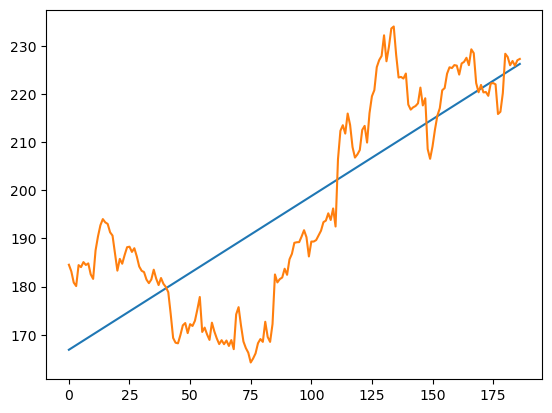

In [81]:
plt.plot(np.arange(len(prices)), trendline)
plt.plot(np.arange(len(prices)), prices)
plt.show()

#### (b) Moving Average De-Trending

In [84]:
# Using a moving average to remove trend
window = 12 # example window size
prices_ma = prices.rolling(window = window).mean()
prices_detrended = prices - prices_ma
prices_detrended = prices_detrended.dropna()

In [86]:
adf_test(prices_detrended)

ADF Statistic: -3.8920821995387875
p-value: 0.0020938966751982476
Critical Value (1%): -3.469
Critical Value (5%): -2.878
Critical Value (10%): -2.576


- Here p-value < 0.05 means data is stationary. Hence we will accept the alternate hypothesis.

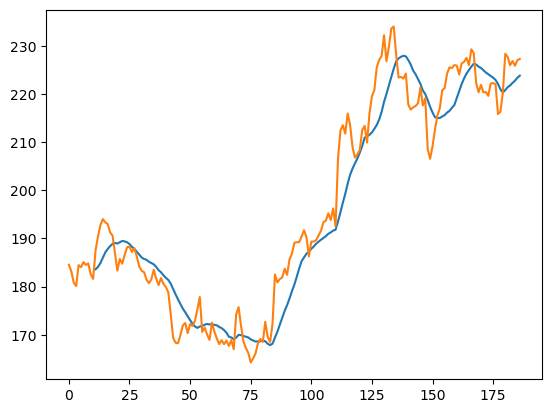

In [89]:
plt.plot(np.arange(len(prices)), prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

### (4) Seasonal Adjustment

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition using moving averages
decomposition = seasonal_decompose(prices, model='additive', period=30)
prices_adjusted = prices / decomposition.seasonal
prices_adjusted = prices_adjusted.dropna()

In [94]:
adf_test(prices_adjusted)

ADF Statistic: -7.424834452726908
p-value: 6.590372931705439e-11
Critical Value (1%): -3.467
Critical Value (5%): -2.878
Critical Value (10%): -2.575


- Here p-value < 0.05 means data is stationary. Hence we will accept the alternate hypothesis.

### White Noise and Random Walk

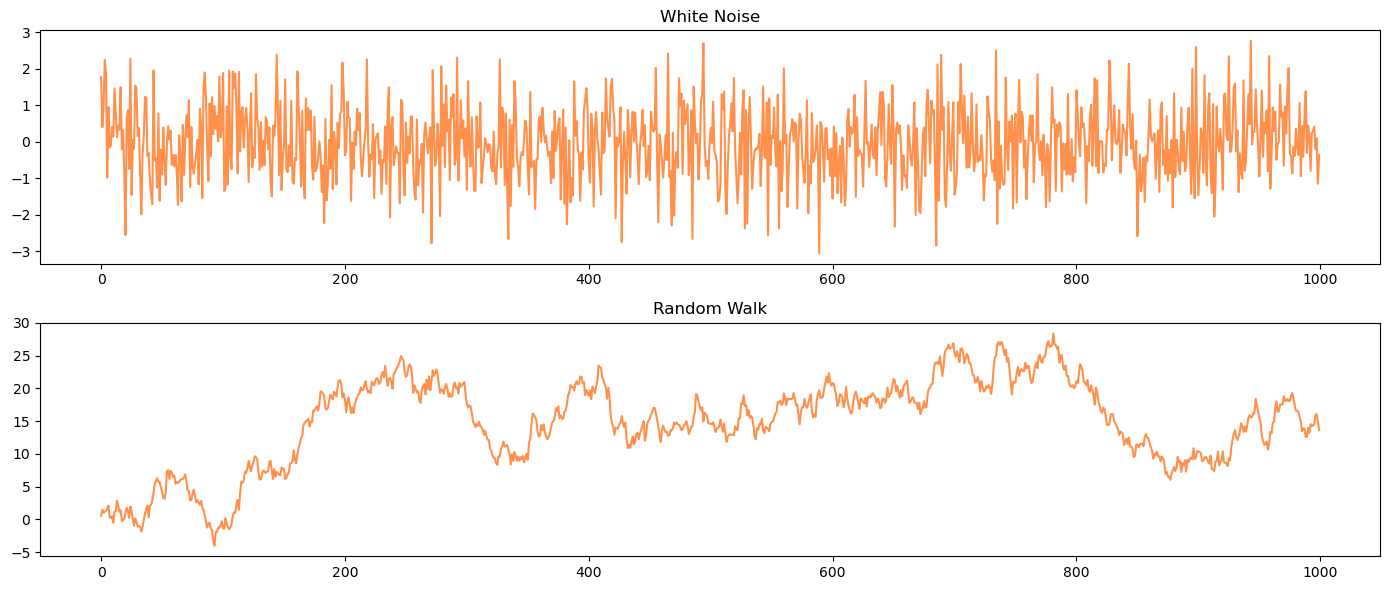


Ljung-Box Test for White Noise:
      lb_stat  lb_pvalue
10  14.025574   0.171828

Ljung-Box Test for Random Walk:
        lb_stat  lb_pvalue
10  8828.660312        0.0


In [98]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

# Generating white noise and random walk for comparison
np.random.seed(0)
n = 1000

# White Noise
white_noise = np.random.normal(0, 1, n)

# Random Walk
random_shocks = np.random.normal(0, 1, n)
random_walk = np.cumsum(random_shocks)

# Create subplots using plt.subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 6))

# Plot White Noise
axes[0].plot(white_noise, color='#FF914D')
axes[0].set_title("White Noise")

# Plot Random Walk
axes[1].plot(random_walk, color='#FF914D')
axes[1].set_title("Random Walk")

plt.tight_layout()
plt.show()

# Ljung-Box test
print("\nLjung-Box Test for White Noise:")
lb_test_white_noise = acorr_ljungbox(white_noise, lags=[10], return_df=True) # kitna 'lags' tak ka mujhe auto-correlation check krna hai
print(lb_test_white_noise)

print("\nLjung-Box Test for Random Walk:")
lb_test_random_walk = acorr_ljungbox(random_walk, lags=[10], return_df=True)
print(lb_test_random_walk)


- if p-value < 0.05 then the data is Random Walk and if p-value > 0.05 then the data is White Noise.

### Time Series Forecasting Models

- Yaha hum past close price ko dekh kar future ke close price ko predict karenge.

### AR Model

In [104]:
# Download AAPL stock data from January 1, 2023 to September 30, 2024
stock_data = yf.download('AAPL', start='2023-01-01', end='2024-09-30')

# If the DataFrame has multi-level columns, flatten them by keeping only the top level
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = stock_data.columns.get_level_values(0)

apple_price_stationary = stock_data['Close'].diff().dropna()

# Display the first 10 rows of the updated DataFrame
print(apple_price_stationary.head(10))

[*********************100%***********************]  1 of 1 completed

Date
2023-01-04    1.275177
2023-01-05   -1.324585
2023-01-06    4.547089
2023-01-09    0.523941
2023-01-10    0.573318
2023-01-11    2.728302
2023-01-12   -0.079071
2023-01-13    1.334442
2023-01-17    1.166443
2023-01-18   -0.721588
Name: Close, dtype: float64


In [105]:
# Split the data into training and testing datasets
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:] # Here we have taken first 30 days as train data and last 30 days as test data

In [106]:
len(train_data) # So prediction will start from here

406

In [110]:
len(test_data)-1

29

In [112]:
len(train_data) + len(test_data)-1

435

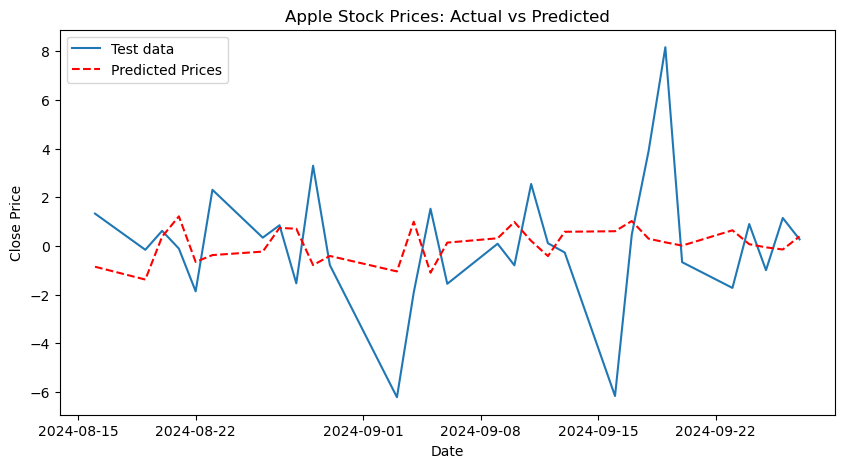

RMSE:  2.75


In [114]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Fit the Autoregresive model (AR) to the training data
model = AutoReg(train_data, lags=30) # lags=30 means I have to predict for 30 days based on the last 30 days
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data), # yaha humne training data diya hai because training data tak humara model fit ho chuka hai and isliye hume uske baad ke data ko predict karna hai
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)


### MA Model

MA Model ka AR model jaisa direct function nhi hota isliye hum ARIMA model ka use kar rhe hai. Jaise ke ARIMA mein teen order hote hai (p,d,q). Agar hum 'p' & 'd' ko '0' rakh denge i.e. (0,0,q) toh jo resultant model hoga vo Moving Average (MA) model hoga.

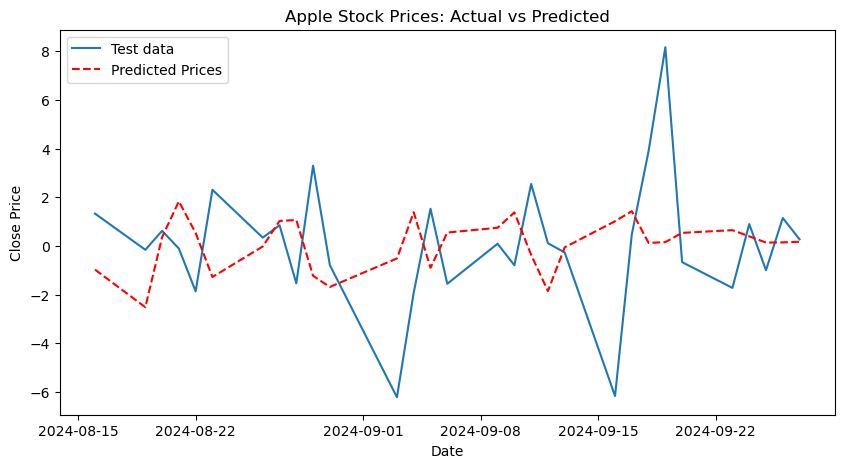

RMSE:  3.02


In [118]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the Moving Average (MA) model to the training data
model = ARIMA(train_data, order=(0,0,30)) # Moving Average Model
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)

### ARMA Model

ARMA Model ka AR model jaisa direct function nhi hota isliye hum ARIMA model ka use kar rhe hai. Jaise ke ARIMA mein teen order hote hai (p,d,q). Agar hum 'd' ka value '0' rakh denge i.e. (p,0,q) toh jo resultant model hoga vo ARMA model hoga.

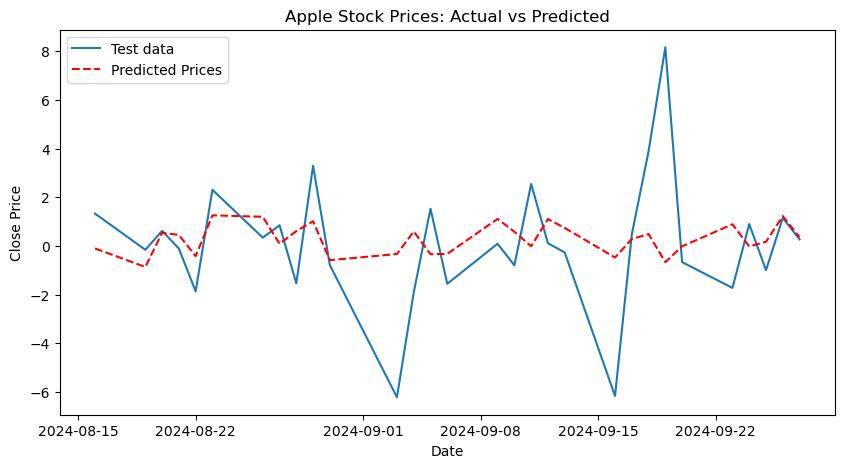

RMSE:  2.62


In [121]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARMA model to the training data
model = ARIMA(train_data, order=(7,0,7)) # ARMA Model. Yaha humne '7' he kyon likha hai because humne try kiya bahut saara number rakh kar based on the RMSE square lekin best model nhi mil rha tha lekin '7' jab rakha toh best model mil gya
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)

### ARIMA Model

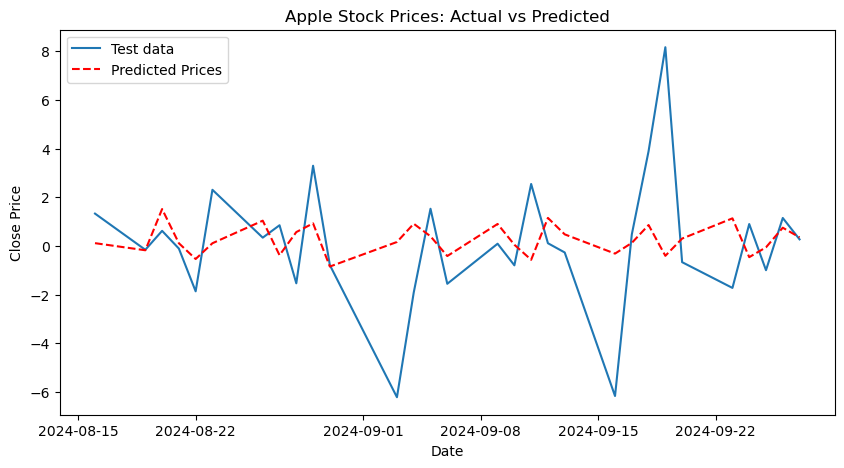

RMSE:  2.67


In [123]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model to the training data
model = ARIMA(train_data, order=(7,1,7)) # ARIMA Model
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)

### SARIMA Model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27579D+00    |proj g|=  1.30671D-01


 This problem is unconstrained.



At iterate    5    f=  2.24894D+00    |proj g|=  1.71064D-01

At iterate   10    f=  2.22120D+00    |proj g|=  1.41120D-01

At iterate   15    f=  2.20817D+00    |proj g|=  4.40823D-02

At iterate   20    f=  2.19499D+00    |proj g|=  2.68014D-02

At iterate   25    f=  2.19359D+00    |proj g|=  2.01299D-02

At iterate   30    f=  2.19091D+00    |proj g|=  2.28564D-02

At iterate   35    f=  2.18764D+00    |proj g|=  2.59070D-02

At iterate   40    f=  2.18706D+00    |proj g|=  1.83405D-02

At iterate   45    f=  2.18650D+00    |proj g|=  9.75032D-03

At iterate   50    f=  2.18581D+00    |proj g|=  5.43846D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

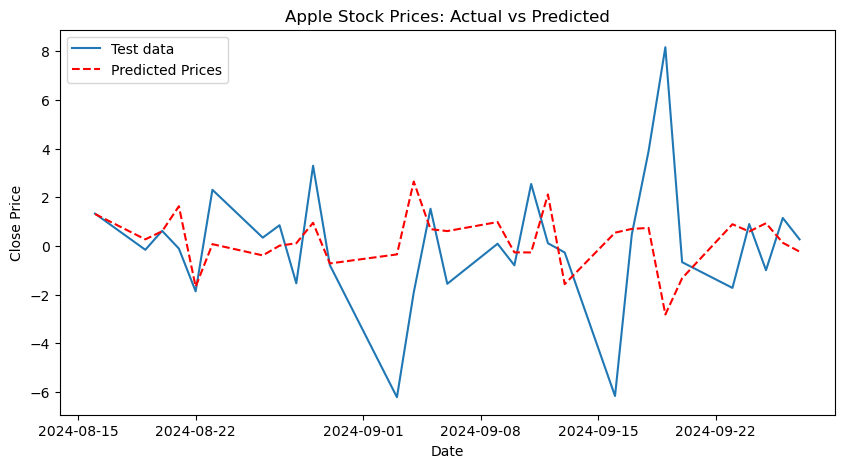

RMSE:  3.06


In [125]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# These orders we have selected randomly taaki mujhe acha score mile
p, d, q = 7, 1, 7
P, D, Q, s = 1, 1, 1, 45 # According to the above Seasonal diagram present in Classical Time Series Decomposition you can see that one complete cycle is starting from february and ends in mid of march i.e. total 45 days

# Fit the SARIMA model
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE: ', rmse)

Since seasonality is present in our data that is why we are getting very low RMSE score as compared to the other model in this SARIMA model.

### Vector Models

- Kisi ek time series ke data ke basis pe hum dusre time series data ko predict karte hai. Isliye yaha hum dekhenge ki Apple ka jo aaj ka data hai vo kal ke Tesla ke close price ko predict kar sakta hai ya phir nhi.

In [135]:
import yfinance as yf
import pandas as pd

# Download Apple stock data from January 1, 2023 to September 30, 2024
stock_data = yf.download('AAPL', start='2023-01-01', end='2024-09-30')

# Download Tesla stock data from January 1, 2023 to September 30, 2024
tsla_data = yf.download('TSLA', start='2023-01-01', end='2024-09-30')

# Flatten MultiIndex columns if necessary
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = stock_data.columns.get_level_values(0)
if isinstance(tsla_data.columns, pd.MultiIndex):
    tsla_data.columns = tsla_data.columns.get_level_values(0)

# Select only the Close prices and rename them for clarity
stock_data = stock_data.rename(columns={'Close': 'AAPL_Close'})
tsla_close = tsla_data[['Close']].rename(columns={'Close': 'TSLA_Close'}) # Tesla data ka jo close price tha usko maine TSLA_Close naam ke column mein daal diya hai in the same tsla data

# Merge the data on the index (date)
merged_data = pd.merge(stock_data, tsla_close, left_index=True, right_index=True, how='inner')

# Create APPL_Close as the shifted version of Apple Close prices
merged_data['APPL_Close'] = merged_data['AAPL_Close'].shift() # APPL_Close ko maine shift by one kiya hai taaki kal ke Apple ke close price ke basis pe aaj ka tesla price predict kar saku

# Drop rows with NA values (if any)
merged_data.dropna(inplace=True) # shift karne se ek single NA value aa jata hai starting mein isliye maine drop kar diya hai

# Display the merged DataFrame
print(merged_data.head(10))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price       AAPL_Close        High         Low        Open    Volume  \
Date                                                                   
2023-01-04  124.907700  127.181268  123.642412  125.431607  89113600   
2023-01-05  123.583115  126.301508  123.326108  125.668865  80962700   
2023-01-06  128.130203  128.792501  123.454572  124.561702  87754700   
2023-01-09  128.654144  131.876686  128.397138  128.970474  70790800   
2023-01-10  129.227463  129.751370  126.647460  128.762863  63896200   
2023-01-11  131.955765  131.975524  128.960591  129.741504  69458900   
2023-01-12  131.876694  132.716915  129.929334  132.341293  71379600   
2023-01-13  133.211136  133.369301  130.146775  130.512517  57809700   
2023-01-17  134.377579  135.712053  132.588384  133.280336  63646600   
2023-01-18  133.655991  137.016907  133.478052  135.247487  69672800   

Price       TSLA_Close  APPL_Close  
Date                                
2023-01-04  113.639999  123.632523  
2023-01-05  110.339996  

In [137]:
from statsmodels.tsa.stattools import grangercausalitytests

# Perform Granger-Causality test: It is used to check ek time series data kya dusre time series data ko kya cause/affect krta hai ya phir nhi
grangercausalitytests(merged_data[['APPL_Close', 'TSLA_Close']].dropna(), maxlag=[14])
print()



Granger Causality
number of lags (no zero) 14
ssr based F test:         F=6.4112  , p=0.0000  , df_denom=393, df_num=14
ssr based chi2 test:   chi2=96.3808 , p=0.0000  , df=14
likelihood ratio test: chi2=86.8074 , p=0.0000  , df=14
parameter F test:         F=6.4112  , p=0.0000  , df_denom=393, df_num=14



- So based on the above F-statistic and p-value ke basis pe keh sakte hai ki apple ka close price jo hai vo tesla ka close price ko completely affect karta hai.

In [140]:
data = merged_data[['APPL_Close', 'TSLA_Close']].diff().dropna() # Here we have calculated first order differencing
train_data, test_data = data[:-14], data[-14:] # Splitting into train and test data

### VAR Model

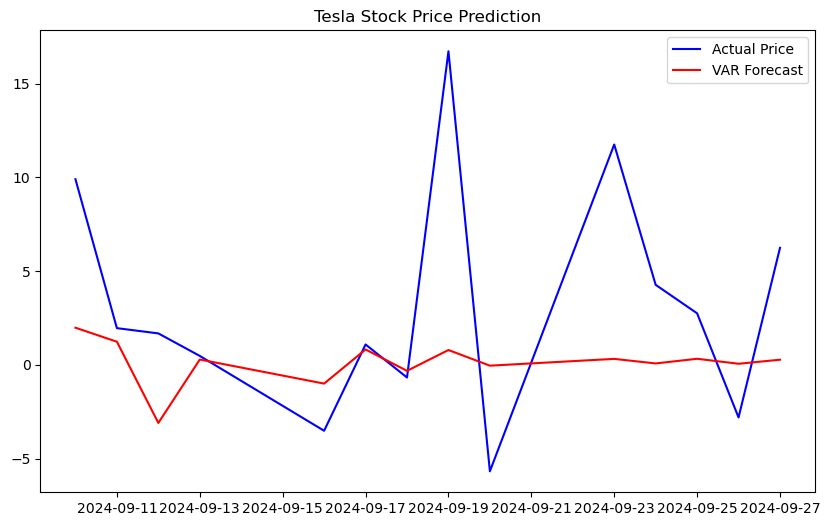

RMSE:  6.41


In [143]:
from statsmodels.tsa.api import VAR, VARMAX

# VAR
model = VAR(train_data)
result = model.fit(maxlags=7)
predictions = result.forecast(train_data.values[-result.k_ar:], steps=len(test_data)) # Forecasting function used for prediction

predictions = pd.DataFrame(predictions, index=test_data.index, columns=test_data.columns)

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color='blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label='VAR Forecast', color='red')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])), 2)
print('RMSE: ', rmse)

### VMA Model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           61     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69102D+00    |proj g|=  1.25007D+00


 This problem is unconstrained.



At iterate    5    f=  5.57832D+00    |proj g|=  5.05636D-02

At iterate   10    f=  5.57503D+00    |proj g|=  4.38171D-02

At iterate   15    f=  5.57416D+00    |proj g|=  1.30410D-02

At iterate   20    f=  5.57347D+00    |proj g|=  9.84874D-03

At iterate   25    f=  5.57306D+00    |proj g|=  7.34441D-03

At iterate   30    f=  5.57296D+00    |proj g|=  7.42588D-03

At iterate   35    f=  5.57290D+00    |proj g|=  2.97854D-03

At iterate   40    f=  5.57288D+00    |proj g|=  6.30749D-04

At iterate   45    f=  5.57288D+00    |proj g|=  7.42747D-04

At iterate   50    f=  5.57287D+00    |proj g|=  8.24874D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

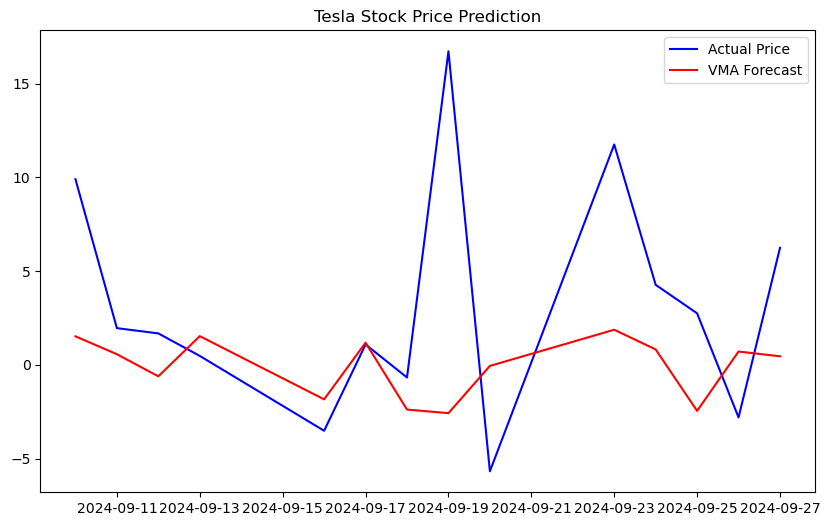

RMSE:  6.92


In [146]:
from statsmodels.tsa.api import VAR, VARMAX

# VMA
model = VARMAX(train_data, order=(0, 14))
result = model.fit()
predictions = result.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color='blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label='VMA Forecast', color='red')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])), 2)
print('RMSE: ', rmse)

### VARIMA Model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          117     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57822D+00    |proj g|=  7.44110D-02


 This problem is unconstrained.



At iterate    5    f=  5.57028D+00    |proj g|=  1.27004D-01

At iterate   10    f=  5.55700D+00    |proj g|=  5.67592D-02

At iterate   15    f=  5.54815D+00    |proj g|=  8.82842D-02

At iterate   20    f=  5.54142D+00    |proj g|=  3.99265D-02

At iterate   25    f=  5.53340D+00    |proj g|=  1.16752D-01

At iterate   30    f=  5.52434D+00    |proj g|=  6.33782D-02

At iterate   35    f=  5.52188D+00    |proj g|=  2.49097D-02

At iterate   40    f=  5.51973D+00    |proj g|=  4.59686D-02

At iterate   45    f=  5.51820D+00    |proj g|=  3.39423D-02

At iterate   50    f=  5.51577D+00    |proj g|=  2.26624D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

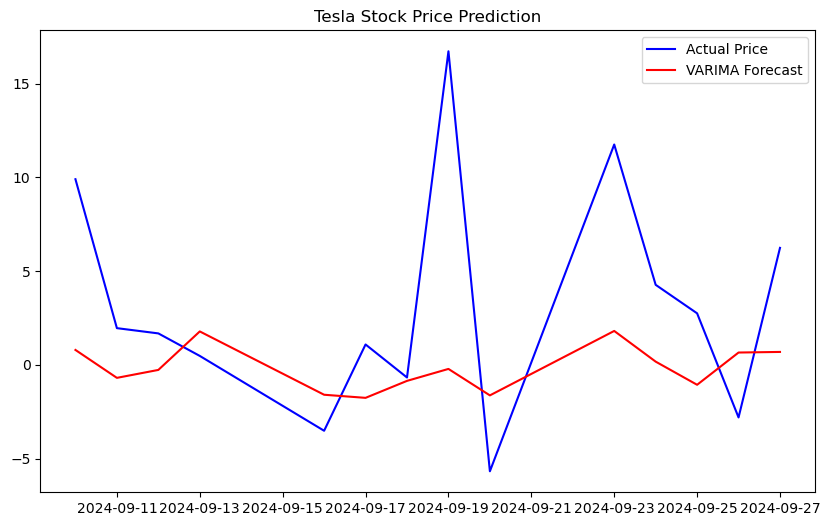

RMSE:  6.45


In [148]:
model = VARMAX(train_data, order=(14, 14))
result = model.fit()
predictions = result.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data)-1,
    dynamic = False
)

# Plot the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color='blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label='VARIMA Forecast', color='red')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])), 2)
print('RMSE: ', rmse)

In [155]:
# Download AAPL stock data from January 1, 2024 to September 30, 2024
stock_data = yf.download('AAPL', start='2024-01-01', end='2024-09-30')

# If the DataFrame has multi-level columns, flatten them by keeping only the top level
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = stock_data.columns.get_level_values(0)

# Display the first 10 rows of the updated DataFrame
print(stock_data.head(10))

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Date                                                                
2024-01-02  184.532074  187.315366  182.792518  186.033057  82488700
2024-01-03  183.150375  184.770652  182.335262  183.120556  58414500
2024-01-04  180.824356  181.997307  179.800504  181.062914  71983600
2024-01-05  180.098709  181.669281  179.094742  180.903888  62303300
2024-01-08  184.452560  184.492330  180.416793  181.003268  59144500
2024-01-09  184.035065  184.045000  181.639444  182.822345  42841800
2024-01-10  185.078827  185.287565  182.822370  183.249812  46792900
2024-01-11  184.482376  185.933669  182.524132  185.426703  49128400
2024-01-12  184.810410  185.625523  184.084771  184.949573  40444700
2024-01-16  182.534088  183.160318  179.850190  181.072860  65603000


### Smoothing Methods

### (1) Moving Average

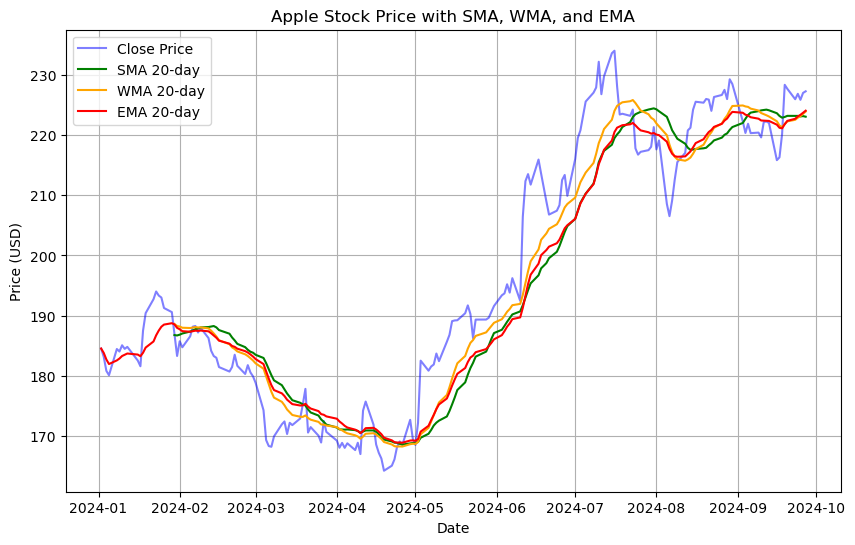

In [167]:
window_size = 20

# Calculate Simple Moving Average (SMA)
stock_data['SMA'] = stock_data['Close'].rolling(window=window_size).mean() # rolling() is used to calculate SMA

# Calculate Weighted Moving Average (WMA)
weights = np.arange(1, window_size + 1) # using arange() we have assign random weights
stock_data['WMA'] = stock_data['Close'].rolling(window_size).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw = True) # Here prices means 'Close' price

# Calculate Exponential Moving Average (EMA)
stock_data['EMA'] = stock_data['Close'].ewm(span = window_size).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(stock_data['SMA'], label=f'SMA {window_size}-day', color='green')
plt.plot(stock_data['WMA'], label=f'WMA {window_size}-day', color='orange')
plt.plot(stock_data['EMA'], label=f'EMA {window_size}-day', color='red')

plt.title('Apple Stock Price with SMA, WMA, and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


### (2) Exponential Smoothing

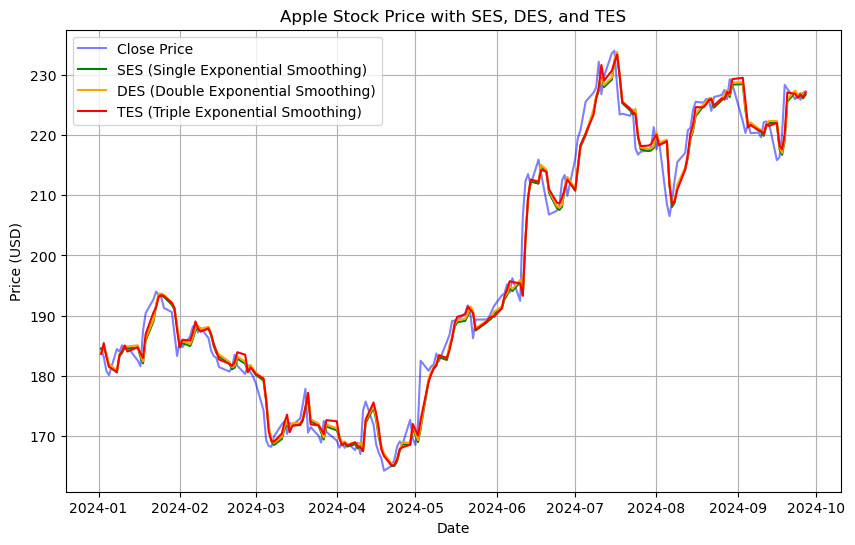

In [173]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

close_prices = stock_data['Close']

# Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(close_prices).fit(smoothing_level=0.7) # jitna kam 'smoothing_level' rehega utna smooth hume graph milega
stock_data['SES'] = ses_model.fittedvalues # Here I have created one new column 'SES' in stock_data jisme fitted values ko pass kiya hai

# Double Exponential Smoothing (DES) - Holt's linear trend model
des_model = ExponentialSmoothing(close_prices, trend='add').fit(smoothing_level=0.7)
stock_data['DES'] = des_model.fittedvalues

# Triple Exponential Smoothing (TES) - Holt's Winters Method
tes_model = ExponentialSmoothing(close_prices, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.7)
stock_data['TES'] = tes_model.fittedvalues

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(stock_data['SES'], label=f'SES (Single Exponential Smoothing)', color='green')
plt.plot(stock_data['DES'], label=f'DES (Double Exponential Smoothing)', color='orange')
plt.plot(stock_data['TES'], label=f'TES (Triple Exponential Smoothing)', color='red')

plt.title('Apple Stock Price with SES, DES, and TES')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


### ACF and PACF Plot

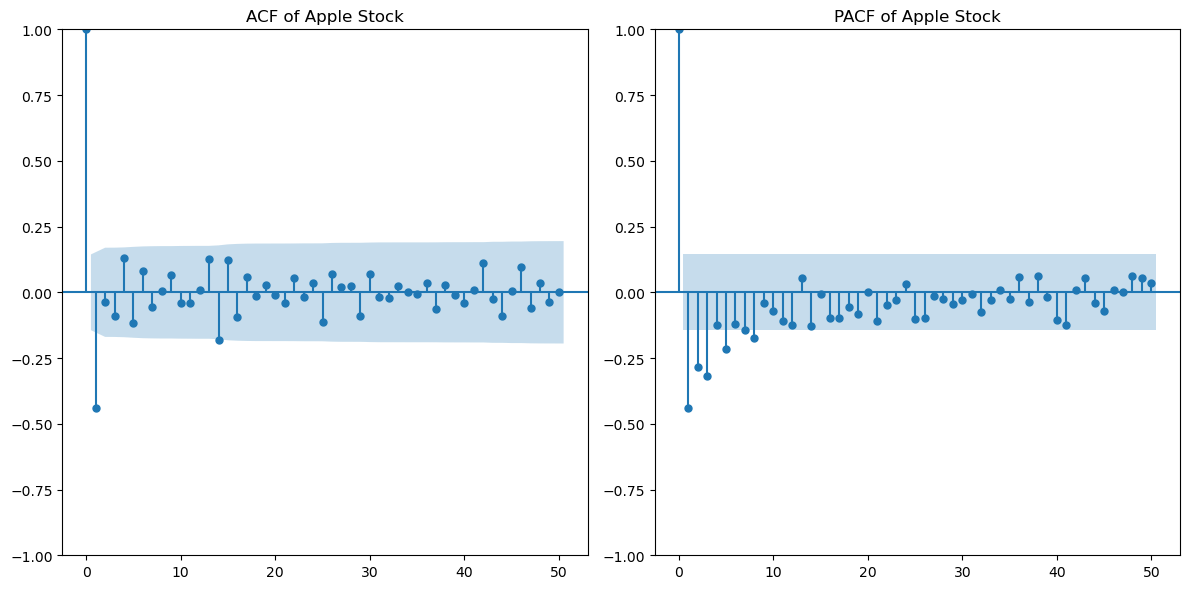

In [178]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(stock_data['Close'].diff().diff().dropna(), ax=plt.gca(), lags=50) # Humara data non-stationary tha isliye hum second order differencing ko perform kiye hai
plt.title('ACF of Apple Stock')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(stock_data['Close'].diff().diff().dropna(), ax=plt.gca(), lags=50, method='ywm') # lags of acf and pacf should be same
plt.title('PACF of Apple Stock')

plt.tight_layout()
plt.show()


- So here from the above figure ACF(q) = 1 and PACF(p) = 8
- Hence the model is the ARIMA model

### Model Evaluation Metrics

In [185]:
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

# Fit the Autoregressive model (AR) to the training data
model = AutoReg(train_data, lags = 30)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data) - 1,
    dynamic = False
)

In [187]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 4. Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((list(test_data) - predictions) / list(test_data))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# aic and bic
aic = model_fit.aic
bic = model_fit.bic
print(f'Akaike Information Criterion (AIC): {aic}')
print(f'Bayesian Information Criterion (BIC): {bic}')


Mean Absolute Error (MAE): 1.9839751198144604
Mean Squared Error (MSE): 7.537964976572227
Root Mean Squared Error (RMSE): 2.745535462632422
Mean Absolute Percentage Error (MAPE): 191.10889807629357%
Akaike Information Criterion (AIC): 1805.4550344628867
Bayesian Information Criterion (BIC): 1931.2018870513634


In [191]:
# Fit the Autoregressive model (AR) to the training data
model = AutoReg(train_data, lags = 20)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start = len(train_data),
    end = len(train_data) + len(test_data) - 1,
    dynamic = False
)

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 4. Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((list(test_data) - predictions) / list(test_data))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# aic and bic
aic = model_fit.aic
bic = model_fit.bic
print(f'Akaike Information Criterion (AIC): {aic}')
print(f'Bayesian Information Criterion (BIC): {bic}')


Mean Absolute Error (MAE): 1.7340902841114045
Mean Squared Error (MSE): 6.660421184905302
Root Mean Squared Error (RMSE): 2.580779181740527
Mean Absolute Percentage Error (MAPE): 136.34370400756225%
Akaike Information Criterion (AIC): 1842.6997379487168
Bayesian Information Criterion (BIC): 1929.7281600769431


### Data Preprocessing

### Handling Missing Values

In [197]:
# Dummy data we have created to show missing values
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-04', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-12'],
    'Price': [100, 101, 103, 106, 107, 108, 109, 111]
}

# Create a DataFrame
data = pd.DataFrame(data)
data['Date'] = pd.to_datetime(data['Date']) # Date value ko maine dataframe banaya kyonki upar mai date ko string banaya tha
data.set_index('Date', inplace=True) # Date column ko maine index set kiya hai

data

,Price
Date,
2024-01-01,100
2024-01-02,101
2024-01-04,103
2024-01-07,106
2024-01-08,107
2024-01-09,108
2024-01-10,109
2024-01-12,111


In [203]:
# Create a complete date range
complete_index = pd.date_range(start='2024-01-01', end='2024-01-12', freq='D')

# Reindex the DataFrame
data = data.reindex(complete_index)

print("Reindexed DataFrame with Missing Dates:\n", data)

Reindexed DataFrame with Missing Dates:
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03    NaN
2024-01-04  103.0
2024-01-05    NaN
2024-01-06    NaN
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11    NaN
2024-01-12  111.0


### (1) Imputation

In [221]:
# Mean Imputation
mean_value = data.mean()
data_mean_imputed = data.fillna(mean_value)

# Median Imputation
median_value = data.median()
data_median_imputed = data.fillna(median_value)

# Mode Imputation
mode_value = data.mode()
data_mode_imputed = data.fillna(mode_value.values[0][0])

# Forward Fill
data_ffill = data.ffill()

# Backward Fill
data_bfill = data.bfill()

print("Original Data:\n", data)
print('----------------\nMean:', mean_value.values[0])
print("----------------\nMean Imputation:\n", data_mean_imputed)

print('----------------\nMedian:', median_value.values[0])
print("----------------\nMedian Imputation:\n", data_median_imputed)

print('----------------\nMode:', mode_value.values[0][0])
print("----------------\nMode Imputation:\n", data_mode_imputed)

print("----------------\nForward Fill:\n", data_ffill)
print("----------------\nBackward Fill:\n", data_bfill)


Original Data:
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03    NaN
2024-01-04  103.0
2024-01-05    NaN
2024-01-06    NaN
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11    NaN
2024-01-12  111.0
----------------
Mean: 105.625
----------------
Mean Imputation:
               Price
2024-01-01  100.000
2024-01-02  101.000
2024-01-03  105.625
2024-01-04  103.000
2024-01-05  105.625
2024-01-06  105.625
2024-01-07  106.000
2024-01-08  107.000
2024-01-09  108.000
2024-01-10  109.000
2024-01-11  105.625
2024-01-12  111.000
----------------
Median: 106.5
----------------
Median Imputation:
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  106.5
2024-01-04  103.0
2024-01-05  106.5
2024-01-06  106.5
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  106.5
2024-01-12  111.0
----------------
Mode: 100.0
----------------
Mode Imputation:
             Price
2024-01-01  100.0
2024-01-02  101.0
2024

### (2) Interpolation

In [224]:
# Linear Interpolation
data_linear_interp = data.interpolate(method='linear')

# Polynomial Interpolation (degree 2)
data_poly_interp = data.interpolate(method='polynomial', order=2)

# Spline Interpolation (order 2)
data_spline_interp = data.interpolate(method='spline', order=2)

print("\nLinear Interpolation:\n", data_linear_interp)
print("\nPolynomial Interpolation (degree 2):\n", data_poly_interp)
print("\nSpline Interpolation (order 2):\n", data_spline_interp)


Linear Interpolation:
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  102.0
2024-01-04  103.0
2024-01-05  104.0
2024-01-06  105.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  110.0
2024-01-12  111.0

Polynomial Interpolation (degree 2):
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  102.0
2024-01-04  103.0
2024-01-05  104.0
2024-01-06  105.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  110.0
2024-01-12  111.0

Spline Interpolation (order 2):
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  102.0
2024-01-04  103.0
2024-01-05  104.0
2024-01-06  105.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  110.0
2024-01-12  111.0


### (3) Predictive Modeling

In [227]:
data['Sales'] = [700, 900, 1000, 2000, 1500, 3000, 2300, 4000, 5900, 6000, 65000, 7000]
data

,Price,Sales
2024-01-01,100.0,700
2024-01-02,101.0,900
2024-01-03,NaN,1000
2024-01-04,103.0,2000
2024-01-05,NaN,1500
2024-01-06,NaN,3000
2024-01-07,106.0,2300
2024-01-08,107.0,4000
2024-01-09,108.0,5900
2024-01-10,109.0,6000


In [229]:
from sklearn.linear_model import LinearRegression

known_data = data.dropna(subset=['Price']) # In this known_data, 'Price' column ka vo row present hai jisme 'Nan' value nhi hai
missing_data = data[data['Price'].isna()] # In this missing_data, 'Price' column ka vo row present hai jisme 'NaN' value hai

# Train a model on known data
model = LinearRegression()
model.fit(known_data[['Sales']], known_data['Price']) # Sales data pe humne train kiya hai and Price value ko predict kiya hai

# Predict missing values
predicted_values = model.predict(missing_data[['Sales']]) # missing_data wale dataframe mein hume sales ka value pata hai but price ka value malum nhi hai. So price ka value predict kar rhe hai based on the sales data
data.loc[data['Price'].isna(), 'Price'] = predicted_values

print("\nData with Predicted Values:\n", data)


Data with Predicted Values:
                  Price  Sales
2024-01-01  100.000000    700
2024-01-02  101.000000    900
2024-01-03  101.675094   1000
2024-01-04  103.000000   2000
2024-01-05  102.434691   1500
2024-01-06  104.713483   3000
2024-01-07  106.000000   2300
2024-01-08  107.000000   4000
2024-01-09  108.000000   5900
2024-01-10  109.000000   6000
2024-01-11  198.903558  65000
2024-01-12  111.000000   7000


### Resampling

### (1) DownSampling

In [238]:
monthly_data = stock_data['Close'].resample('M').mean() # Converting daily data into monthly data
print("\nMonthly Downsampled Data:\n", monthly_data)


Monthly Downsampled Data:
 Date
2024-01-31    186.603933
2024-02-29    183.835616
2024-03-31    171.884888
2024-04-30    168.807460
2024-05-31    185.584773
2024-06-30    205.572245
2024-07-31    223.846304
2024-08-31    221.073106
2024-09-30    222.781260
Freq: ME, Name: Close, dtype: float64


### (2) UpSampling

In [242]:
hourly_data = stock_data['Close'].resample('H').interpolate(method='linear') # Converting daily data into hourly data
print("\nHourly Upsampled Data:\n", hourly_data)


Hourly Upsampled Data:
 Date
2024-01-02 00:00:00    184.532074
2024-01-02 01:00:00    184.474503
2024-01-02 02:00:00    184.416932
2024-01-02 03:00:00    184.359362
2024-01-02 04:00:00    184.301791
                          ...    
2024-09-26 20:00:00    227.244850
2024-09-26 21:00:00    227.256075
2024-09-26 22:00:00    227.267300
2024-09-26 23:00:00    227.278524
2024-09-27 00:00:00    227.289749
Freq: h, Name: Close, Length: 6457, dtype: float64
